In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
# Data loading
df=pd.read_csv('/content/Data.csv')
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


**Preprocessing & EDA**

In [3]:
#Checking for Null values

df.isnull().sum()

,0
S no,0
Temperature,320
Humidity,25
Wind Speed,71
general diffuse flows,308
diffuse flows,15
Air Quality Index (PM),18
Cloudiness,0
Power Consumption in A Zone,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
# Dropping 'S no' column as it is insignificant/not an important feature
df.drop(['S no'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [7]:
object_cols=list(df.select_dtypes(include='object'))
object_cols

['Temperature', 'Humidity', 'Wind Speed']

In [8]:
# replacing alphanumeric strings to numeric string in object columns
for i in object_cols:
    df[i]=df[i].str.replace('[^\d+\.\d+]','',regex=True)

In [9]:
# converting string to numeric columns
for i in object_cols:
    df[i]=pd.to_numeric(df[i])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   52263 non-null  float64
 1   Humidity                      52558 non-null  float64
 2   Wind Speed                    52512 non-null  float64
 3   general diffuse flows         52275 non-null  float64
 4   diffuse flows                 52568 non-null  float64
 5   Air Quality Index (PM)        52565 non-null  float64
 6   Cloudiness                    52583 non-null  int64  
 7    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.2 MB


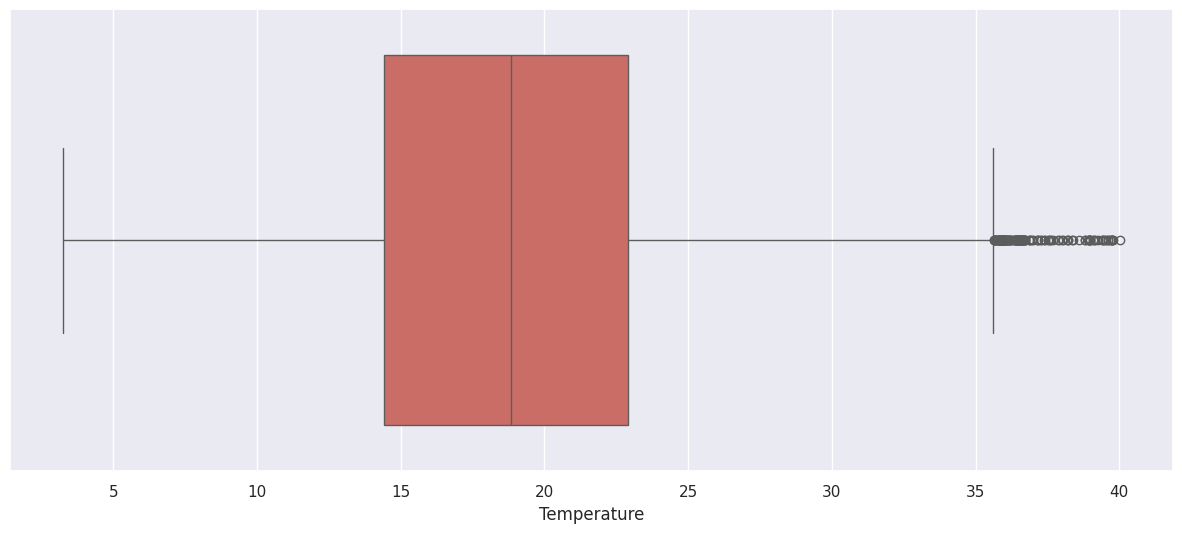

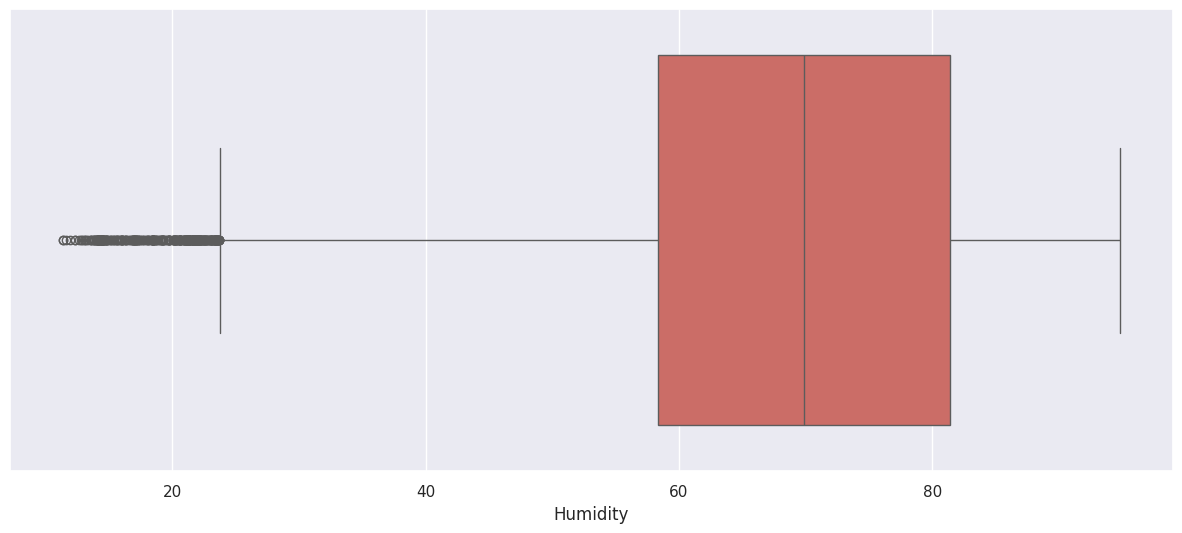

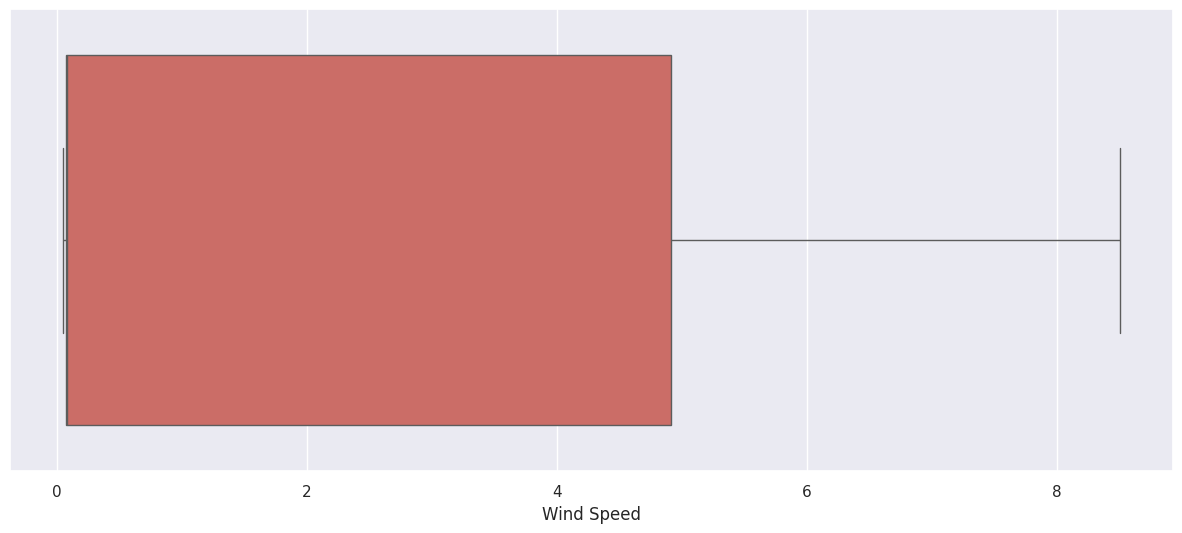

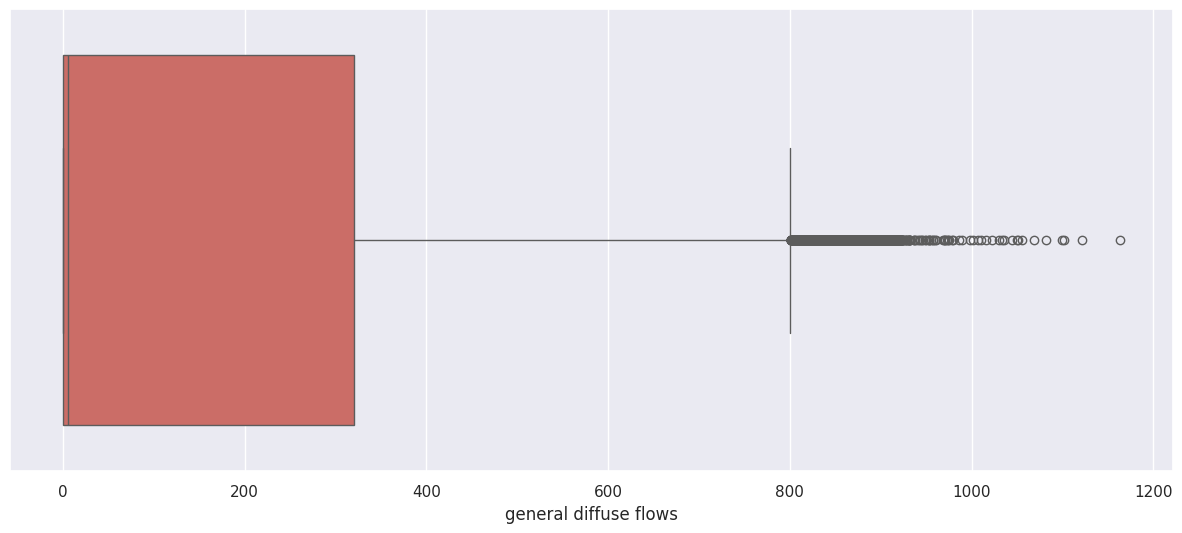

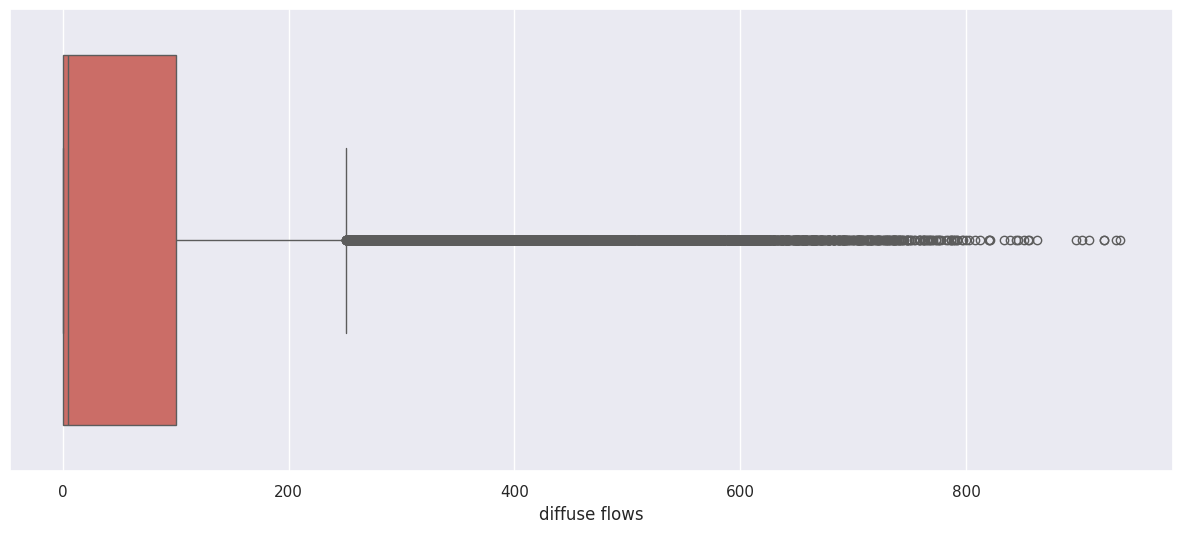

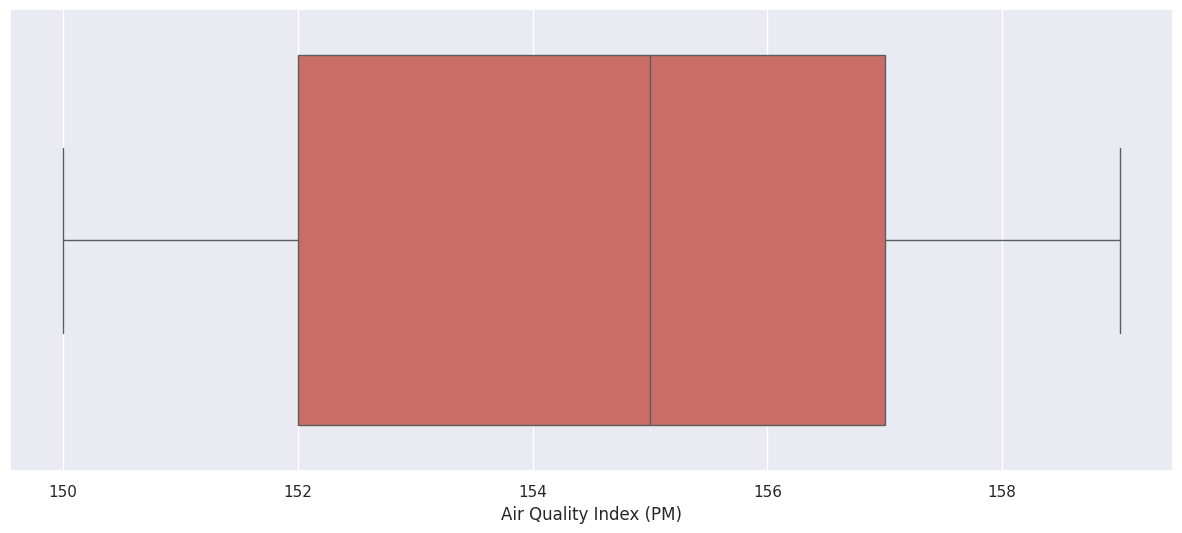

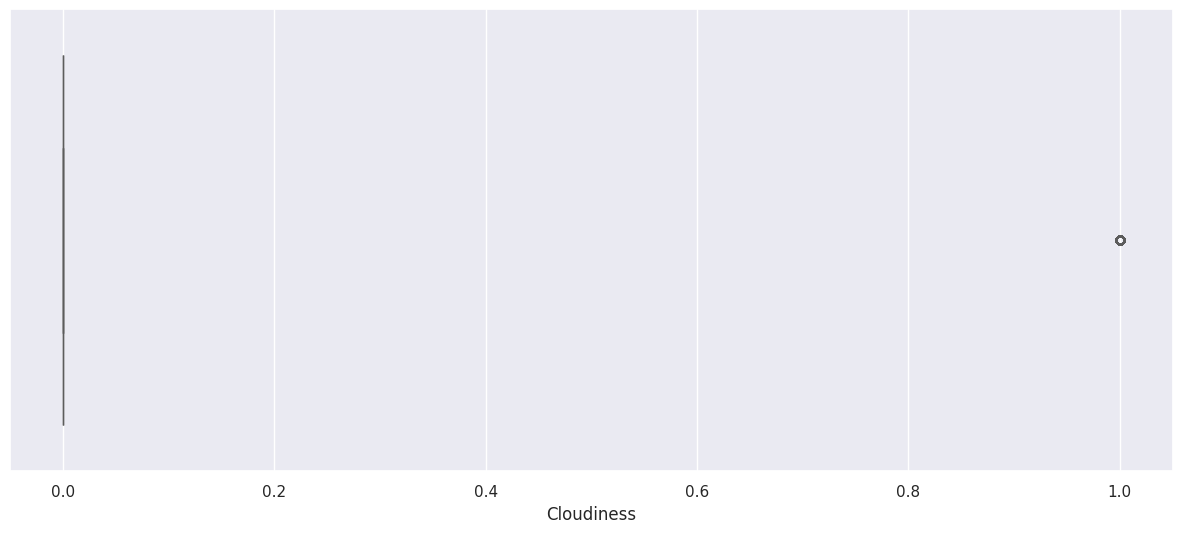

In [11]:
# visualising outliers in each independent columns
for i in list(df.columns):
    if i!=' Power Consumption in A Zone':
        plt.figure(figsize=(15,6))
        sns.boxplot(x=i, data=df, palette='hls')
        plt.show()

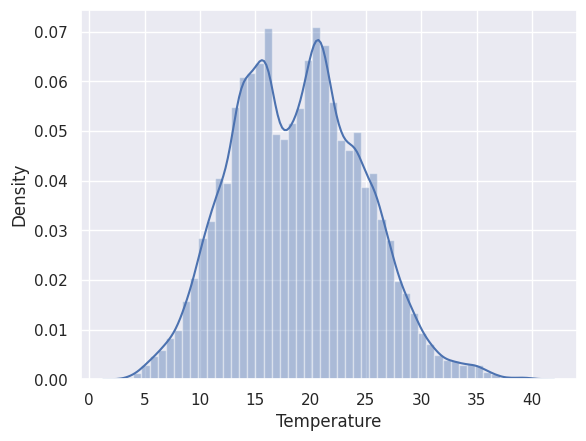

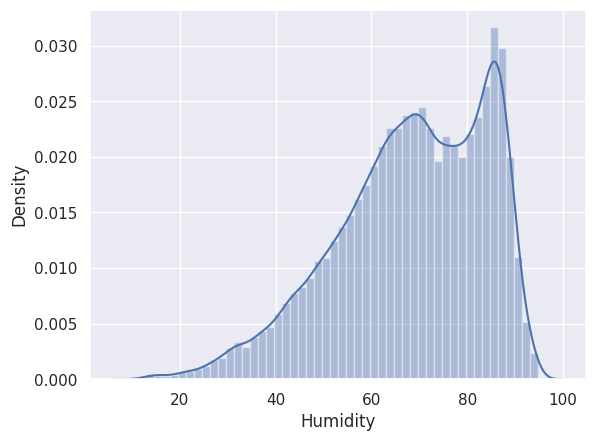

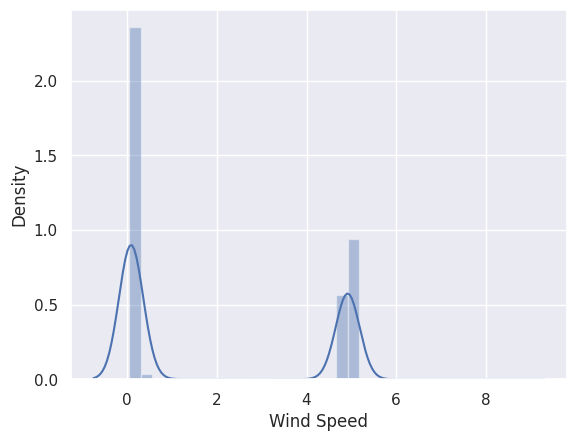

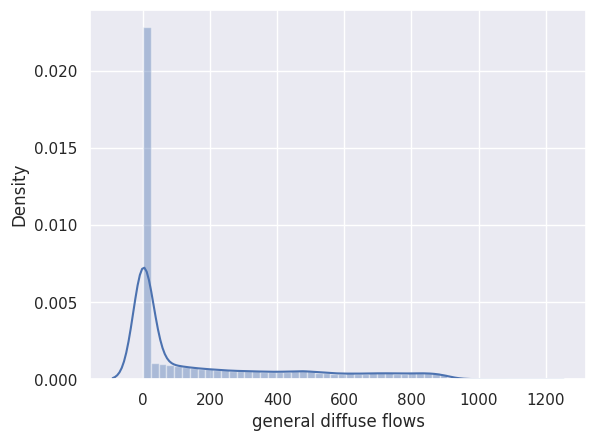

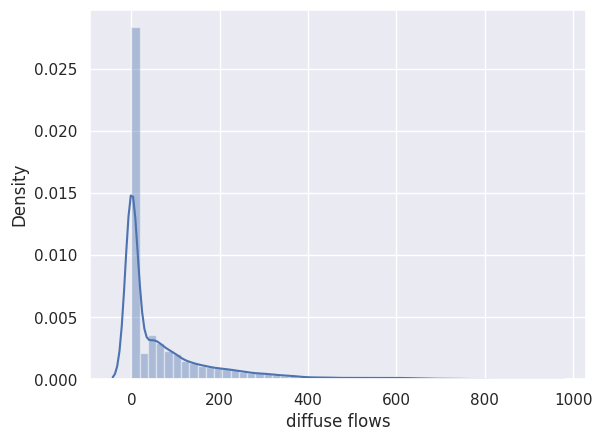

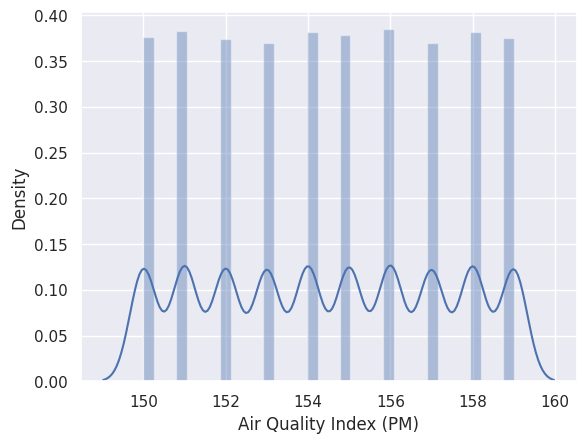

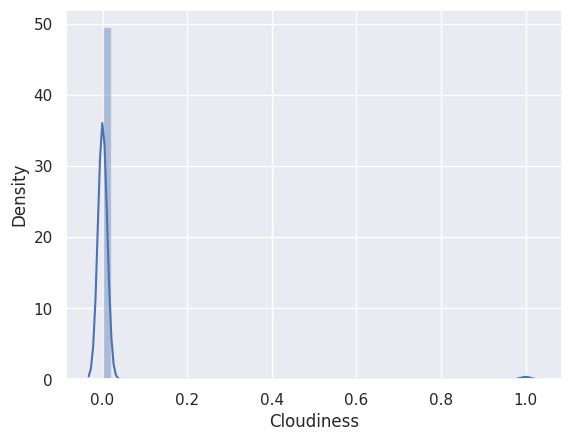

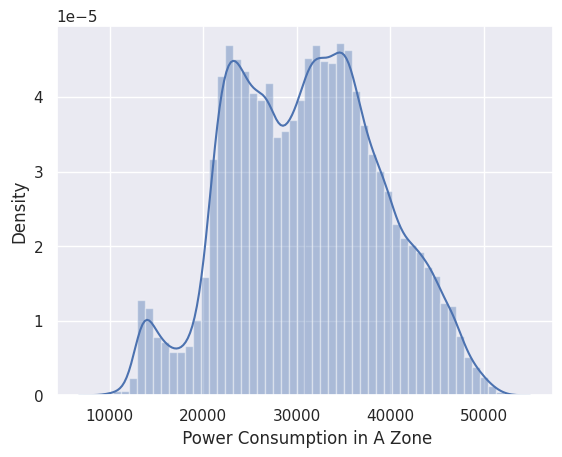

In [12]:
#Visualising distribution of values in each independent columns
for i in list(df.columns):
    sns.distplot(df[i])
    plt.show()

In [13]:
# Filling null values with median values instead of mean as outliers are present in the data
for i in list(df.columns):
    if i!=' Power Consumption in A Zone':
        df[i]=df[i].fillna(df[i].median())

In [14]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
general diffuse flows,0
diffuse flows,0
Air Quality Index (PM),0
Cloudiness,0
Power Consumption in A Zone,0


In [15]:
#Checking for duplicate columns
df.duplicated().sum()

0

In [16]:
# Handling outliers using IQR method and capping them
for i in list(df.columns):
    if i!=' Power Consumption in A Zone':
        q1=np.quantile(df[i],0.25)
        q3=np.quantile(df[i],0.75)
        iqr=q3-q1
        ll=q1-1.5*iqr
        ul=q3+1.5*iqr
        df[i]=np.where(df[i]>ul,ul,np.where(df[i]<ll,ll,df[i]))

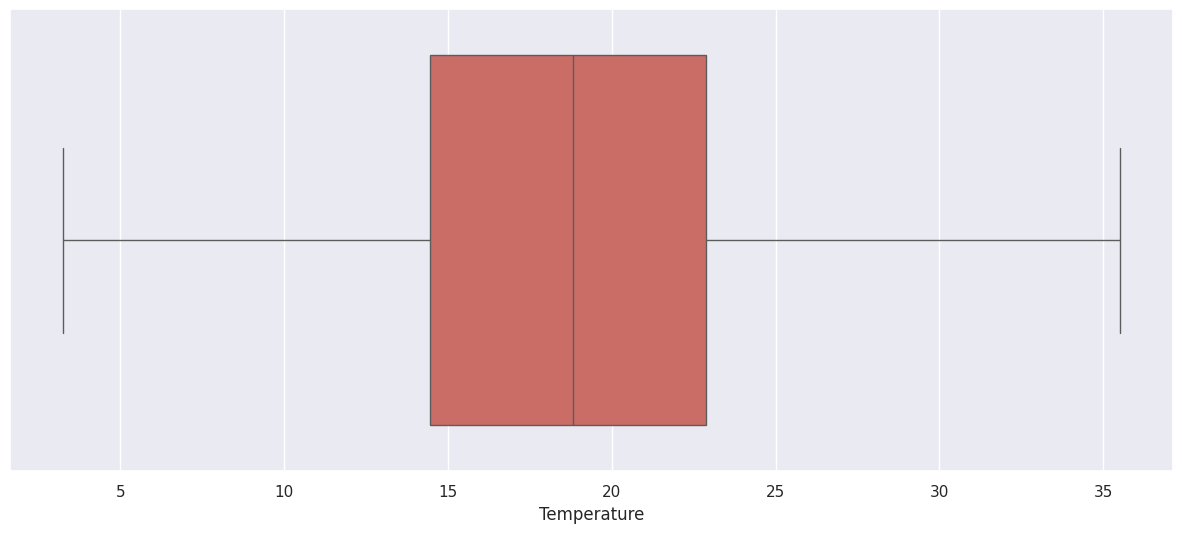

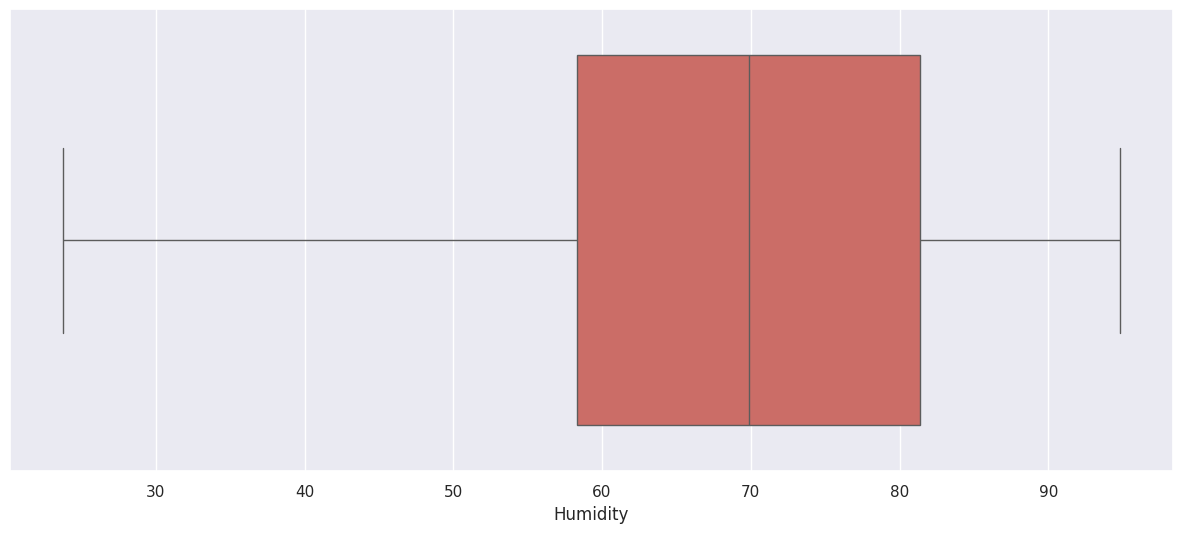

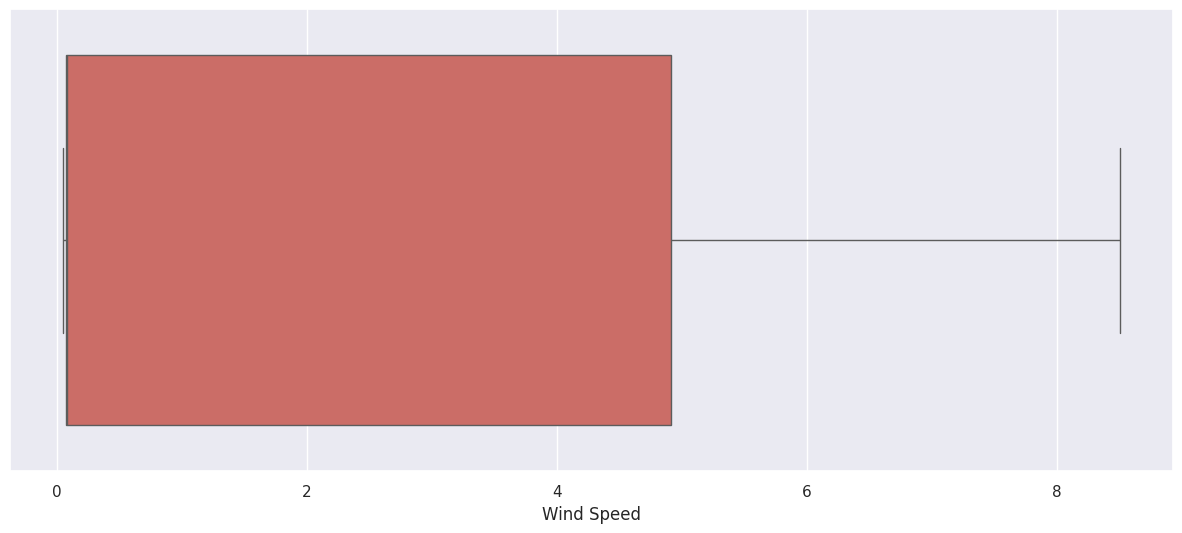

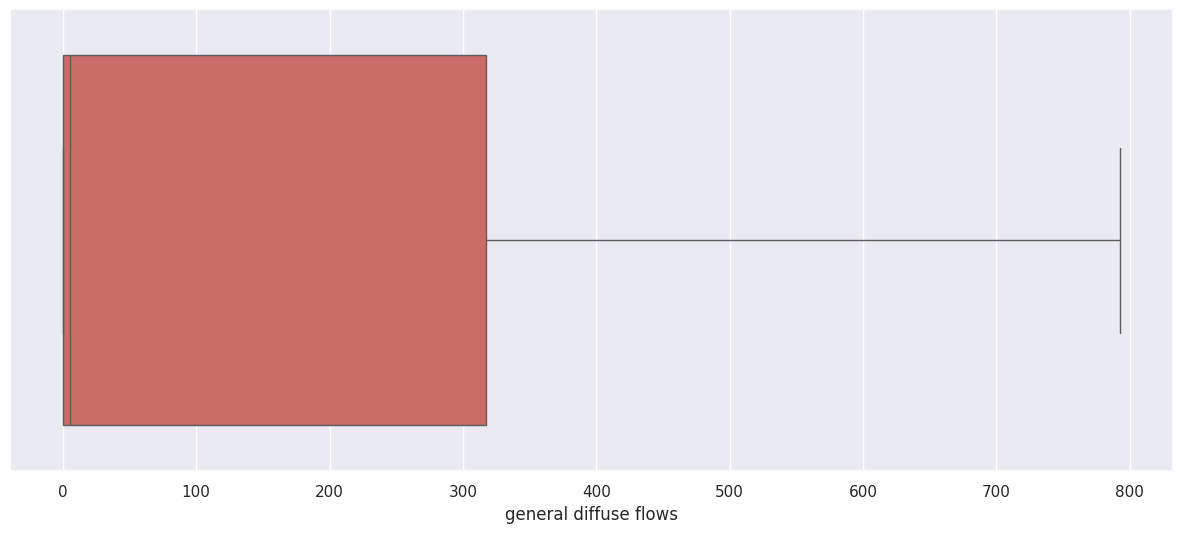

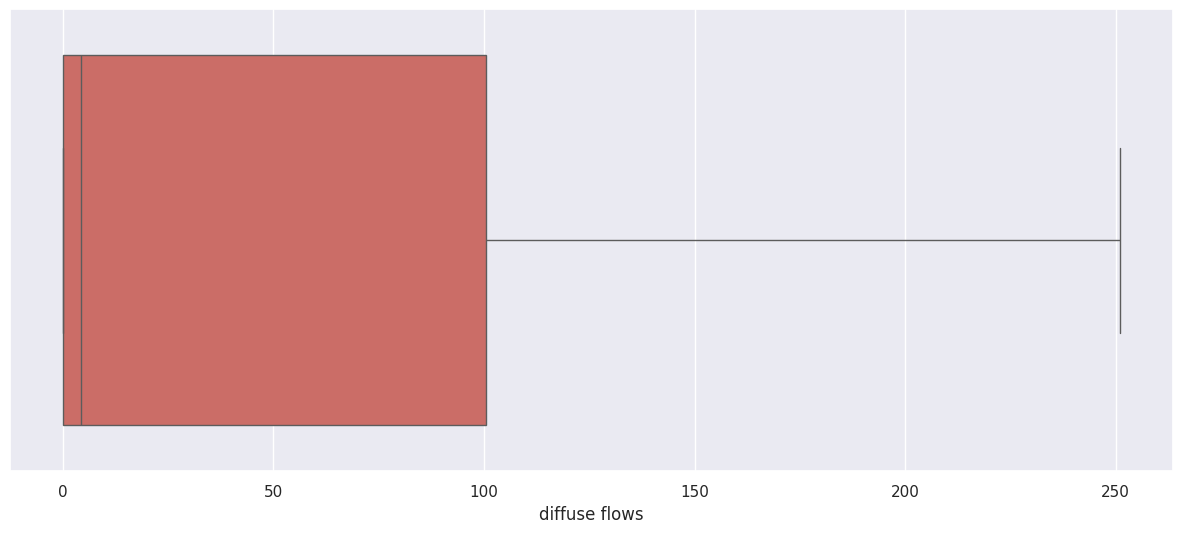

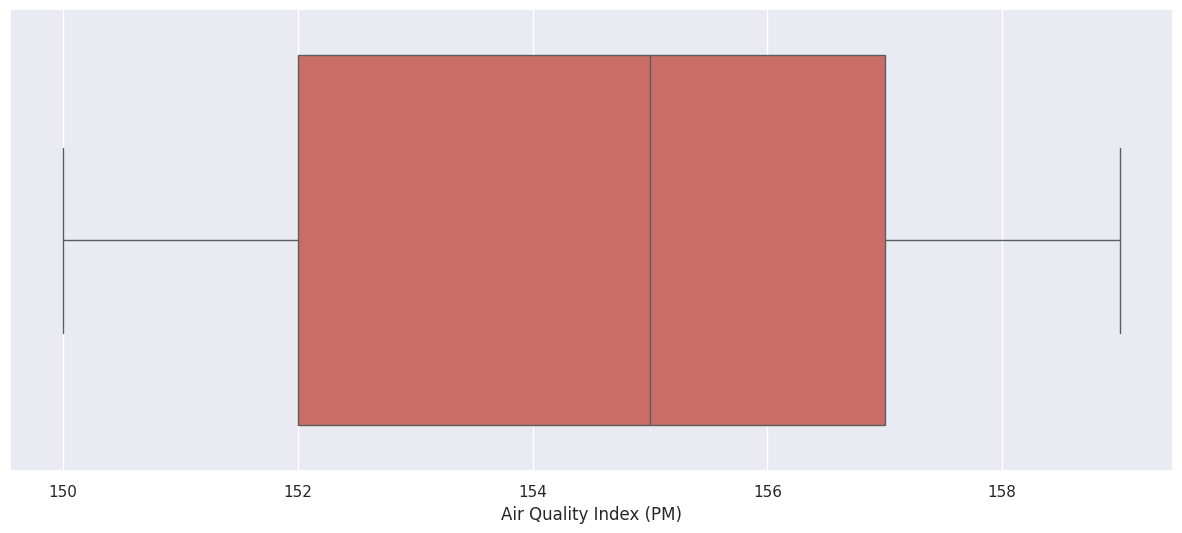

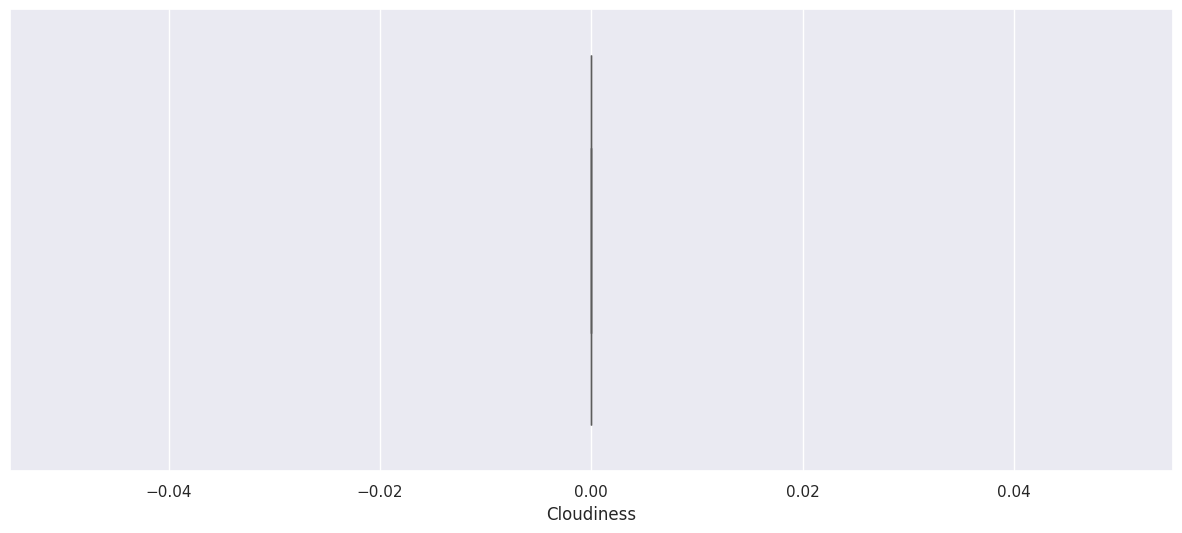

In [17]:
for i in list(df.columns):
    if i!=' Power Consumption in A Zone':
        plt.figure(figsize=(15,6))
        sns.boxplot(x=i, data=df, palette='hls')
        plt.show()

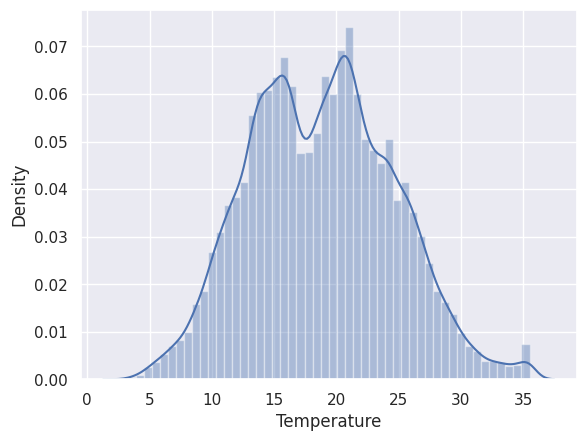

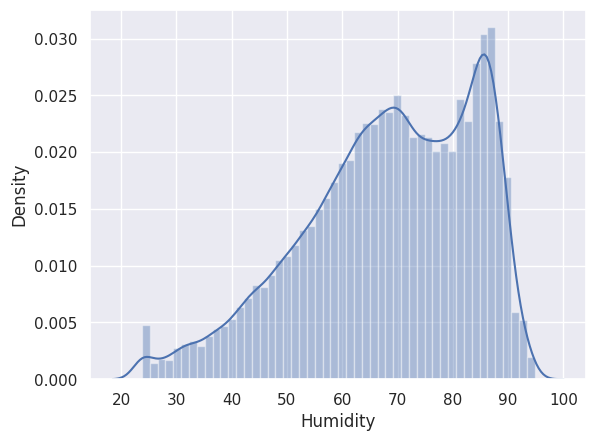

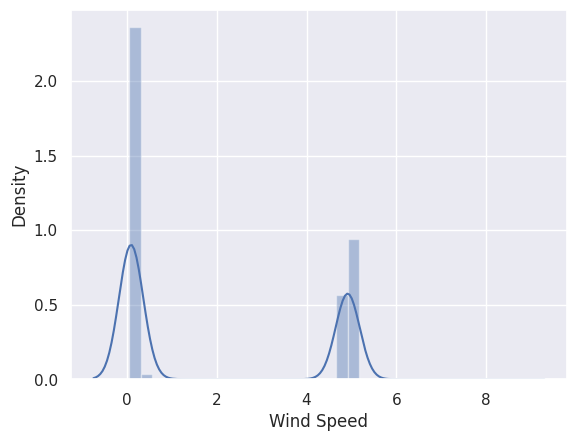

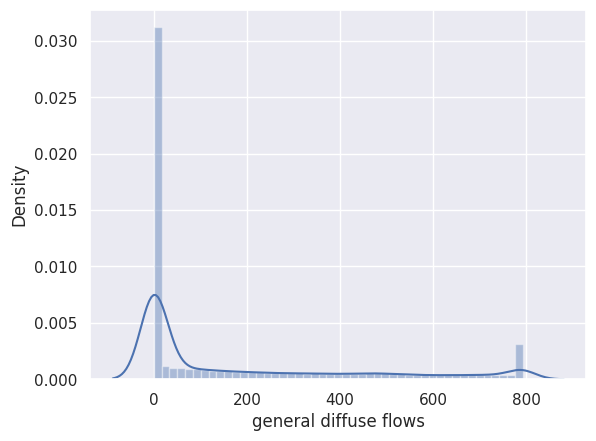

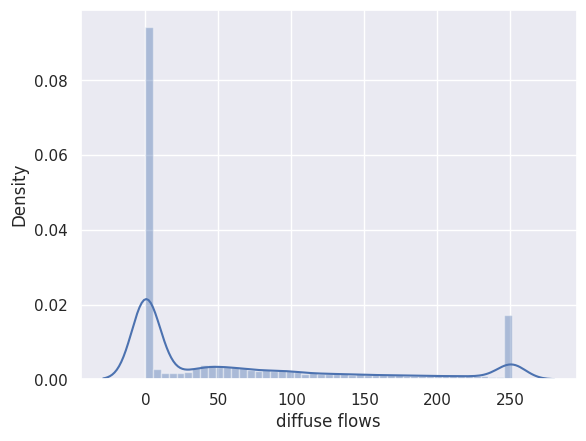

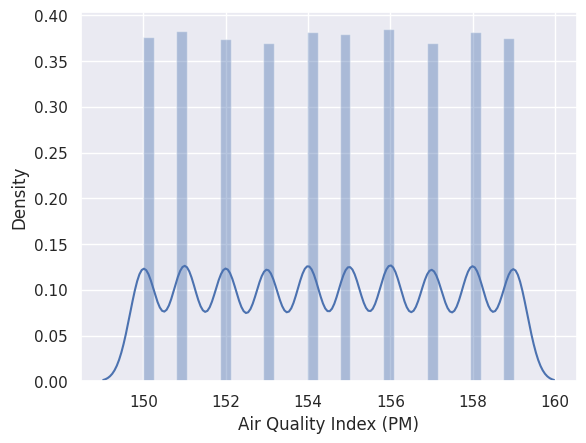

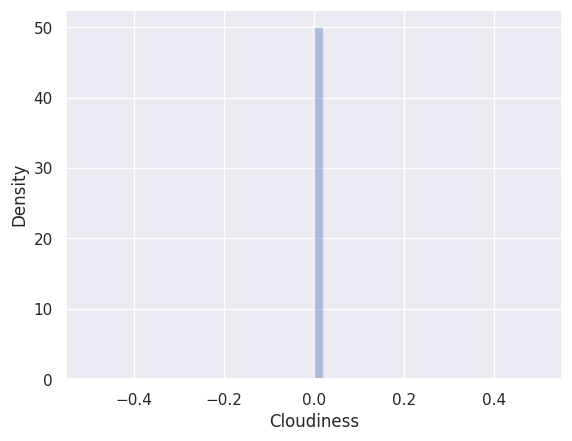

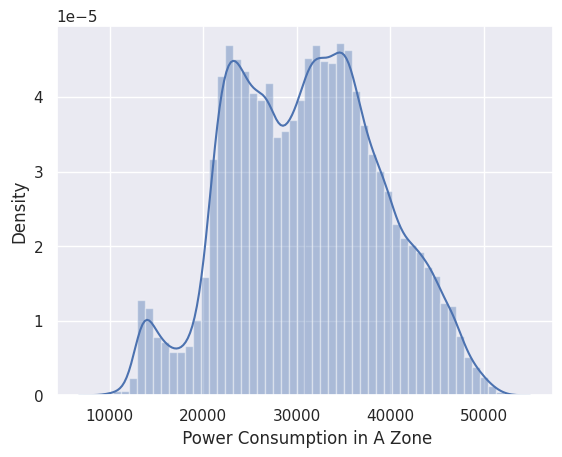

In [18]:
for i in list(df.columns):
    sns.distplot(df[i])
    plt.show()

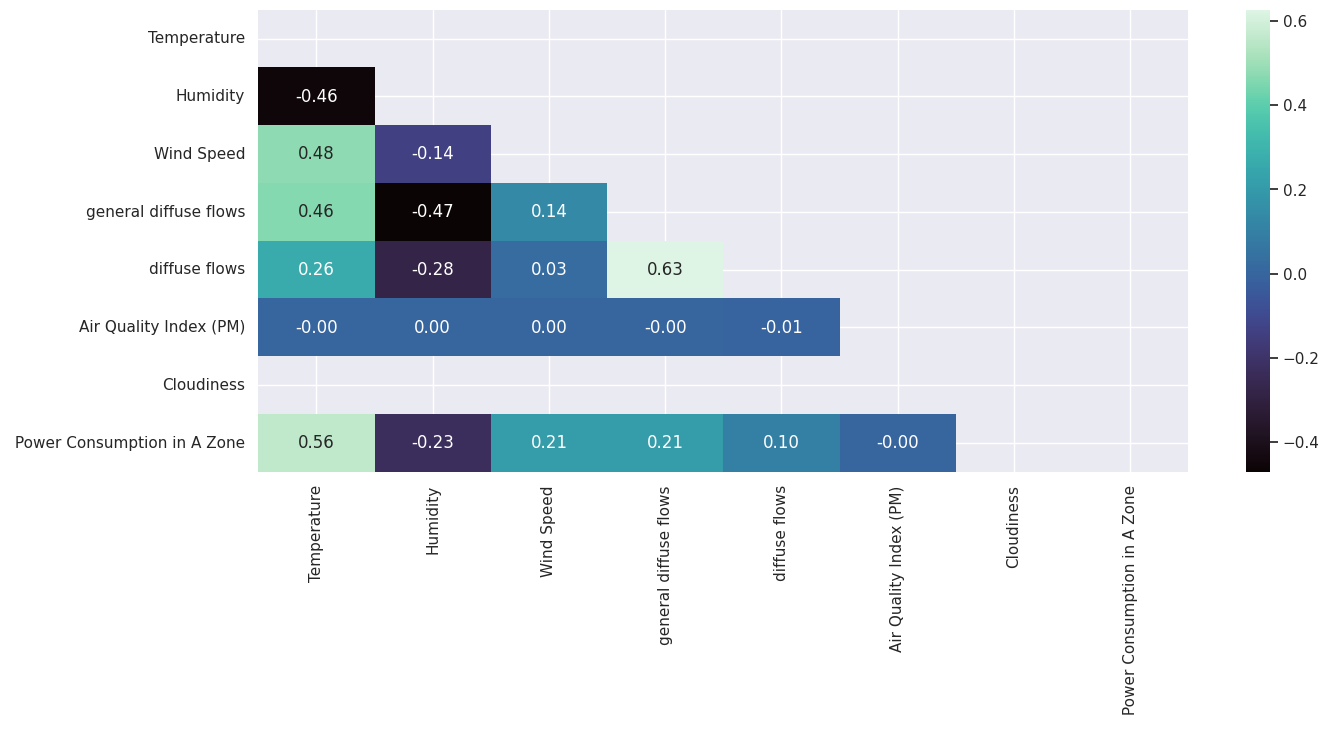

In [19]:
corr=df.corr()
mask=np.triu(corr)
mask=mask
plt.figure(figsize=(15,6))
sns.heatmap(corr,mask=mask,annot=True,fmt='.2f',cmap='mako')
plt.show()

In [20]:
#!pip install -U dtale

In [21]:
'''import dtale
dtale.show(df)'''

'import dtale\ndtale.show(df)'

In [22]:
# Splitting independent and dependent variables
x=df.drop(' Power Consumption in A Zone',axis=1)
y=df.iloc[:,-1]

In [23]:
print(x.shape,y.shape)

(52583, 7) (52583,)


In [24]:
# Spliting dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [25]:
# Scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

**Model Building and Evaluation**

Model-1: Linear Regression

---



In [26]:
# Model-1: Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_train_pred=lr.predict(x_train_scaled)
y_test_pred=lr.predict(x_test_scaled)

In [27]:

print(f"(Train) r2_score: {r2_score(y_train,y_train_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_pred)}")

(Train) r2_score: 0.32290726243821033
(Test) r2_score: 0.3190540090981039


In [28]:
print(f"intercept: {lr.intercept_}")
print(f"slope: {lr.coef_}")

intercept: 31062.588620801052
slope: [ 5.11561936e+03  1.53144641e+02 -6.81286484e+02 -3.72423227e+02
 -2.15773841e+02 -1.88023514e+00  0.00000000e+00]


In [29]:
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")

(Train) adjusted r2_score:0.3228042316263928
(Test) adjusted r2_score:0.31895039195032715


In [30]:
print(f"(Train) mean_squared_error:{mean_squared_error(y_train,y_train_pred)}")
print(f"(Test) mean_squared_error:{mean_squared_error(y_test,y_test_pred)}")
print(f"(Train) mean_absolute_error:{mean_absolute_error(y_train,y_train_pred)}")
print(f"(Test) mean_absolute_error:{mean_absolute_error(y_test,y_test_pred)}")

(Train) mean_squared_error:43522404.863201834
(Test) mean_squared_error:43966822.09289675
(Train) mean_absolute_error:5335.621162968542
(Test) mean_absolute_error:5369.673060570018


In [31]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
# Hyperparameter tuning using GridSearchCV with LinearRegression Model
from sklearn.model_selection import GridSearchCV
param_space = {'copy_X': [True,False],'fit_intercept': [True,False],'n_jobs': [1,5,10,15,None],'positive': [True,False]}
grid_search = GridSearchCV(lr, param_space, cv=10)
grid_search.fit(x_train_scaled, y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.3225795711040657


In [33]:
# Due to overfitting issue using Cross Validation technique
score=cross_val_score(lr,x_train_scaled,y_train,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.32692299 0.31402634 0.34055733 0.32138905 0.31937105 0.31280038
 0.32226823 0.32822472 0.32266058 0.31757504]
0.3225795711040657
0.34055733433068636


In [34]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(lr,x_test_scaled,y_test,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.28663403 0.31128766 0.31340308 0.33129551 0.30815893 0.34636626
 0.32682997 0.33844158 0.33905767 0.27746201]
0.31789366997922497
0.34636626363333545


Model-2: RandomForest

---



In [35]:
#Model-2: RandomForest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train_scaled,y_train)
y_train_rf_pred=rf.predict(x_train_scaled)
y_test_rf_pred=rf.predict(x_test_scaled)

In [36]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_rf_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_rf_pred)}")
r2_score_train=r2_score(y_train,y_train_rf_pred)
r2_score_test=r2_score(y_test,y_test_rf_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_rf_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_rf_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_rf_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_rf_pred)}")

(Train) r2_score: 0.9467500213506924
(Test) r2_score: 0.6168587628129272
(Train) adjusted r2_score:0.9467419184894075
(Test) adjusted r2_score:0.6168004615633076
(Train) adjusted r2_score:3422820.8355587646
(Test) adjusted r2_score:24738382.83348278
(Train) adjusted r2_score:1274.8133504864181
(Test) adjusted r2_score:3467.888892783489


In [37]:
#Hyperparameter Tuning
param_grid={'bootstrap': [True, False],
 'max_depth': [16,64],
 'max_features': ['log2', 'sqrt'],
 'n_estimators': [200,400]}
rf=RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(x_train_scaled,y_train)
print(grid_search.best_params_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
{'bootstrap': False, 'max_depth': 64, 'max_features': 'sqrt', 'n_estimators': 400}


In [38]:
rf=RandomForestRegressor(bootstrap=False, max_depth=16, max_features='log2', n_estimators=400)
rf.fit(x_train_scaled,y_train)
y_train_rf_pred=rf.predict(x_train_scaled)
y_test_rf_pred=rf.predict(x_test_scaled)
print(f"(Train) r2_score: {r2_score(y_train,y_train_rf_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_rf_pred)}")
r2_score_train=r2_score(y_train,y_train_rf_pred)
r2_score_test=r2_score(y_test,y_test_rf_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_rf_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_rf_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_rf_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_rf_pred)}")


(Train) r2_score: 0.8347064461515424
(Test) r2_score: 0.5607830588252143
(Train) adjusted r2_score:0.83468129401492
(Test) adjusted r2_score:0.5607162247336596
(Train) adjusted r2_score:10624797.125686968
(Test) adjusted r2_score:28359037.82507214
(Train) adjusted r2_score:2314.059185274722
(Test) adjusted r2_score:3957.8695745798186


In [39]:
# Due to overfitting issue using Cross Validation technique
score=cross_val_score(rf,x_train_scaled,y_train,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.57619326 0.56368225 0.57691589 0.56547558 0.55604015 0.55015316
 0.56166404 0.55989785 0.57354357 0.55446868]
0.5638034434729268
0.5769158908711467


In [40]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(rf,x_test_scaled,y_test,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.46063432 0.51109566 0.52436344 0.50093818 0.52167591 0.51754109
 0.50619696 0.48692325 0.52585517 0.479068  ]
0.5034291981984385
0.525855165459949


In [43]:
importances = rf.feature_importances_
feature_names= x_train.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance':importances})
feature_importance = feature_importance.sort_values(by='Importance',ascending = False)

Text(0.5, 1.0, 'Feature Importance')

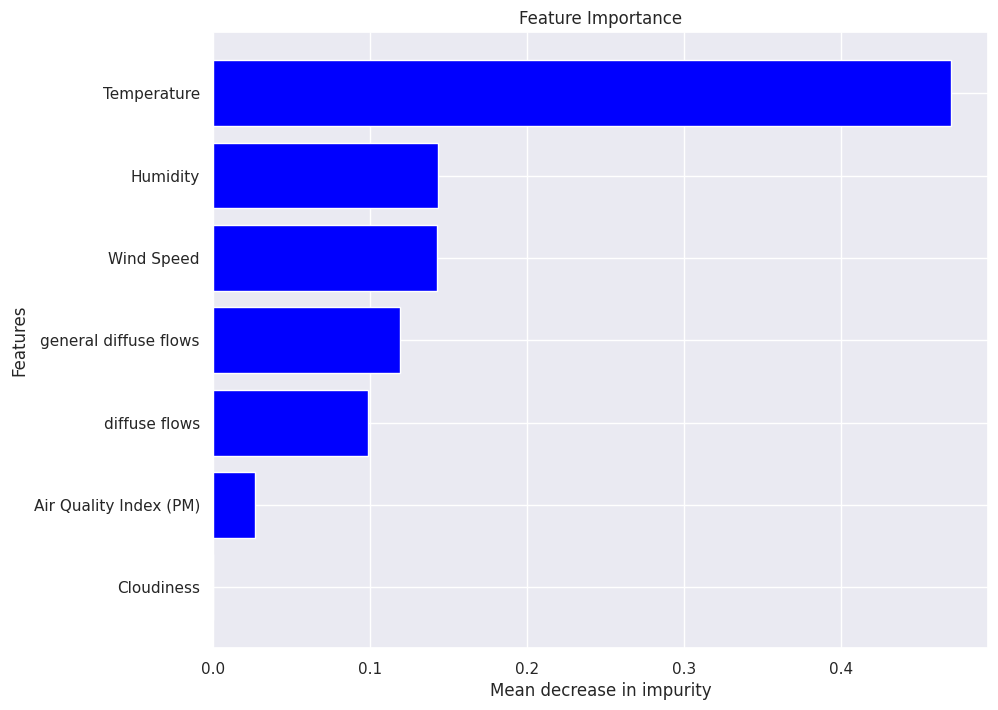

In [44]:
# Ploting the feature importance

plt.figure(figsize=(10,8))
plt.barh(feature_importance['Feature'],feature_importance['Importance'], color = 'blue')
plt.gca().invert_yaxis()
plt.xlabel('Mean decrease in impurity')
plt.ylabel('Features')
plt.title('Feature Importance')

Model-3: DecisionTree

---



In [45]:
from sklearn.tree import DecisionTreeRegressor
#approach-1
dt1=DecisionTreeRegressor(criterion="squared_error")
dt1.fit(x_train_scaled,y_train)
y_train_dt1_pred=dt1.predict(x_train_scaled)
y_test_dt1_pred=dt1.predict(x_test_scaled)

#approach-2
dt2=DecisionTreeRegressor(criterion="absolute_error")
dt2.fit(x_train_scaled,y_train)
y_train_dt2_pred=dt2.predict(x_train_scaled)
y_test_dt2_pred=dt2.predict(x_test_scaled)

In [46]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_dt1_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_dt1_pred)}")
r2_score_train=r2_score(y_train,y_train_dt1_pred)
r2_score_test=r2_score(y_test,y_test_dt1_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_dt1_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_dt1_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_dt1_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_dt1_pred)}")

(Train) r2_score: 0.9997763860901929
(Test) r2_score: 0.2686799173226949
(Train) adjusted r2_score:0.9997763520636536
(Test) adjusted r2_score:0.2685686349271873
(Train) adjusted r2_score:14373.533455270415
(Test) adjusted r2_score:47219339.562376566
(Train) adjusted r2_score:2.280563407027052
(Test) adjusted r2_score:4226.400818980698


In [47]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_dt2_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_dt2_pred)}")
r2_score_train=r2_score(y_train,y_train_dt2_pred)
r2_score_test=r2_score(y_test,y_test_dt2_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_dt2_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_dt2_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_dt2_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_dt2_pred)}")

(Train) r2_score: 0.9997763860901929
(Test) r2_score: 0.22862299131981445
(Train) adjusted r2_score:0.9997763520636536
(Test) adjusted r2_score:0.22850561360327315
(Train) adjusted r2_score:14373.533455270415
(Test) adjusted r2_score:49805705.8273785
(Train) adjusted r2_score:2.280563407027052
(Test) adjusted r2_score:4351.84441532205


In [48]:
pruned_tree=DecisionTreeRegressor(criterion="squared_error",max_depth=18)
pruned_tree.fit(x_train_scaled,y_train)
y_train_pt_pred=pruned_tree.predict(x_train_scaled)
y_test_pt_pred=pruned_tree.predict(x_test_scaled)
print(f'Train r2 score: {r2_score(y_train_pt_pred,y_train)}')
print(f'Test r2 score: {r2_score(y_test_pt_pred,y_test)}')

Train r2 score: 0.8459137871819882
Test r2 score: 0.25942684781387904


In [49]:
pruned_tree1=DecisionTreeRegressor(criterion="absolute_error",max_depth=24)
pruned_tree1.fit(x_train_scaled,y_train)
y_train_pt1_pred=pruned_tree1.predict(x_train_scaled)
y_test_pt1_pred=pruned_tree1.predict(x_test_scaled)
print(f'Train r2 score: {r2_score(y_train_pt1_pred,y_train)}')
print(f'Test r2 score: {r2_score(y_test_pt1_pred,y_test)}')

Train r2 score: 0.9468604574704105
Test r2 score: 0.25234767729638685


In [50]:
# Due to overfitting issue using Cross Validation technique
score=cross_val_score(dt1,x_train_scaled,y_train,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.30290669 0.30052772 0.25211545 0.25504956 0.24792433 0.21422069
 0.24749659 0.24075929 0.26620255 0.25340687]
0.2580609750719788
0.30290669331920683


In [51]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(pruned_tree,x_test_scaled,y_test,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.08400989 0.07620177 0.13358375 0.12194062 0.06122584 0.18178923
 0.06472609 0.02995866 0.14610002 0.10487837]
0.10044142218134566
0.1817892279489125


Model-4: Bagging

---



In [52]:
from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor()
bgr.fit(x_train_scaled,y_train)
y_train_bgr_pred=bgr.predict(x_train_scaled)
y_test_bgr_pred=bgr.predict(x_test_scaled)

In [53]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_bgr_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_bgr_pred)}")
r2_score_train=r2_score(y_train,y_train_bgr_pred)
r2_score_test=r2_score(y_test,y_test_bgr_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_bgr_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_bgr_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_bgr_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_bgr_pred)}")

(Train) r2_score: 0.9252005302528795
(Test) r2_score: 0.576707543361783
(Train) adjusted r2_score:0.9251891482816014
(Test) adjusted r2_score:0.5766431324428286
(Train) adjusted r2_score:4807986.595174358
(Test) adjusted r2_score:27330837.36880237
(Train) adjusted r2_score:1406.3759547886718
(Test) adjusted r2_score:3610.7989472052172


In [54]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(bgr,x_train_scaled,y_train,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.58080301 0.58207762 0.5709176  0.58410142 0.56295765 0.55337416
 0.56751237 0.56266328 0.58255028 0.55951534]
0.5706472743068236
0.584101423695998


In [55]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(bgr,x_test_scaled,y_test,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.43397806 0.46801761 0.49200725 0.45468188 0.46704965 0.4917738
 0.47974554 0.46218219 0.5107377  0.4404827 ]
0.47006563799341483
0.5107377022473879


Model-5 AdaBoost

---



In [56]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train_scaled,y_train)
y_train_abc_pred=abr.predict(x_train_scaled)
y_test_abc_pred=abr.predict(x_test_scaled)

In [57]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_bgr_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_bgr_pred)}")
r2_score_train=r2_score(y_train,y_train_bgr_pred)
r2_score_test=r2_score(y_test,y_test_bgr_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_bgr_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_bgr_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_bgr_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_bgr_pred)}")

(Train) r2_score: 0.9252005302528795
(Test) r2_score: 0.576707543361783
(Train) adjusted r2_score:0.9251891482816014
(Test) adjusted r2_score:0.5766431324428286
(Train) adjusted r2_score:4807986.595174358
(Test) adjusted r2_score:27330837.36880237
(Train) adjusted r2_score:1406.3759547886718
(Test) adjusted r2_score:3610.7989472052172


In [58]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(abr,x_train_scaled,y_train,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.34590733 0.33208124 0.35175468 0.3415136  0.33292497 0.32547428
 0.34465243 0.34270409 0.34627704 0.33887579]
0.340216545387291
0.3517546794151265


In [59]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(abr,x_test_scaled,y_test,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.29856835 0.33901809 0.33216087 0.34499924 0.33167879 0.3597547
 0.33903471 0.34558583 0.36298306 0.30354775]
0.33573313903345137
0.3629830612576652


Model-6 Gradient Boosting

---



In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train_scaled,y_train)
y_train_gbr_pred=gbr.predict(x_train_scaled)
y_test_gbr_pred=gbr.predict(x_test_scaled)

In [61]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_gbr_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_gbr_pred)}")
r2_score_train=r2_score(y_train,y_train_gbr_pred)
r2_score_test=r2_score(y_test,y_test_gbr_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_gbr_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_gbr_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_gbr_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_gbr_pred)}")

(Train) r2_score: 0.4405920777084529
(Test) r2_score: 0.42238810813947536
(Train) adjusted r2_score:0.44050695457956157
(Test) adjusted r2_score:0.4223002149767926
(Train) adjusted r2_score:35957818.96188695
(Test) adjusted r2_score:37294821.65617445
(Train) adjusted r2_score:4710.093303275002
(Test) adjusted r2_score:4817.631950021038


In [62]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(gbr,x_train_scaled,y_train,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.43909282 0.42328059 0.44550419 0.42703598 0.43279192 0.41834774
 0.43011507 0.43346537 0.43493737 0.42630857]
0.43108796225930607
0.44550419347555925


In [63]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(gbr,x_test_scaled,y_test,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.36921559 0.41111097 0.42389918 0.41977389 0.41488066 0.4375198
 0.42520354 0.42227149 0.45081859 0.3946386 ]
0.41693323221615247
0.4508185930197126


Model 7 - XGBoost

---



In [64]:
'''!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2'''

'!pip uninstall -y scikit-learn\n!pip install scikit-learn==1.5.2'

In [65]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train_scaled,y_train)
y_train_xgb_pred=xgb.predict(x_train_scaled)
y_test_xgb_pred=xgb.predict(x_test_scaled)

In [66]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_xgb_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_xgb_pred)}")
r2_score_train=r2_score(y_train,y_train_xgb_pred)
r2_score_test=r2_score(y_test,y_test_xgb_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_xgb_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_xgb_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_xgb_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_xgb_pred)}")

(Train) r2_score: 0.6627062622460913
(Test) r2_score: 0.5400103385223511
(Train) adjusted r2_score:0.6626549374486244
(Test) adjusted r2_score:0.5399403435192732
(Train) adjusted r2_score:21680685.374370296
(Test) adjusted r2_score:29700275.6180017
(Train) adjusted r2_score:3439.573526776565
(Test) adjusted r2_score:4047.556087161917


In [67]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(xgb,x_train_scaled,y_train,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.55849781 0.54465945 0.55164957 0.54891724 0.53125283 0.52563624
 0.53724512 0.54362703 0.55410906 0.54182124]
0.5437415577272026
0.5584978072929185


In [68]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(xgb,x_test_scaled,y_test,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.42173811 0.44647946 0.49311752 0.4662309  0.47816418 0.47312333
 0.46270291 0.43937963 0.49247076 0.44121635]
0.461462315675894
0.4931175194305072


Model 8 - KNN

---



In [69]:
from sklearn.neighbors import KNeighborsRegressor
error_rate=[]
for i in range(1,30):
  knn=KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train_scaled,y_train)
  y_train_knn_pred=knn.predict(x_train)
  y_test_knn_pred=knn.predict(x_test)
  error_rate.append(np.mean(y_test_knn_pred!=y_test))
print(error_rate)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


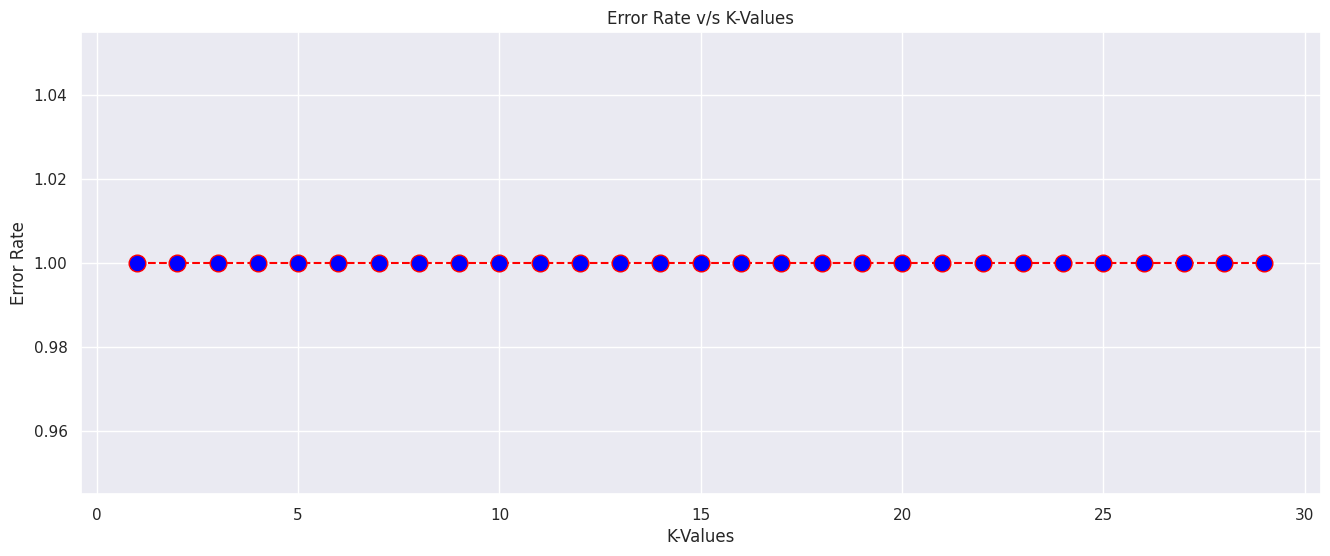

In [70]:
plt.figure(figsize=(16,6))
plt.plot(range(1,30),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=12)
plt.title('Error Rate v/s K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')
plt.show()

In [71]:
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train_scaled,y_train)
y_train_knn_pred=knn.predict(x_train)
y_test_knn_pred=knn.predict(x_test)

In [72]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_knn_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_knn_pred)}")
r2_score_train=r2_score(y_train,y_train_knn_pred)
r2_score_test=r2_score(y_test,y_test_knn_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_knn_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_knn_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_knn_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_knn_pred)}")

(Train) r2_score: -0.060316368906726314
(Test) r2_score: -0.0780746476059262
(Train) adjusted r2_score:-0.06047771350579145
(Test) adjusted r2_score:-0.07823869441957632
(Train) adjusted r2_score:68155388.07404105
(Test) adjusted r2_score:69608334.38694988
(Train) adjusted r2_score:6741.632996409583
(Test) adjusted r2_score:6830.365025744747


In [73]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(knn,x_train_scaled,y_train,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.36623725 0.33800283 0.37904423 0.37257868 0.34259554 0.35671335
 0.36856925 0.34426957 0.38203301 0.32002193]
0.3570065633578491
0.38203300654694616


In [74]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(knn,x_test_scaled,y_test,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.24247343 0.31290049 0.25238393 0.31467132 0.27547394 0.30932201
 0.26032942 0.22467137 0.31684695 0.27299077]
0.2782063627597241
0.316846945335163


Model 9 - SVM

---



In [75]:
from sklearn.svm import SVR

In [76]:
svr_lr=SVR(kernel='linear')
svr_lr.fit(x_train_scaled,y_train)
y_train_svr_lr_pred=svr_lr.predict(x_train_scaled)
y_test_svr_lr_pred=svr_lr.predict(x_test_scaled)

In [77]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_svr_lr_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_svr_lr_pred)}")
r2_score_train=r2_score(y_train,y_train_svr_lr_pred)
r2_score_test=r2_score(y_test,y_test_svr_lr_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_svr_lr_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_svr_lr_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_svr_lr_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_svr_lr_pred)}")

(Train) r2_score: 0.2516168199110309
(Test) r2_score: 0.24485550517811117
(Train) adjusted r2_score:0.2515029410842209
(Test) adjusted r2_score:0.24474059750590493
(Train) adjusted r2_score:48104836.97393109
(Test) adjusted r2_score:48757616.75942915
(Train) adjusted r2_score:5274.736198332272
(Test) adjusted r2_score:5306.413071207922


In [78]:
# Kernel - Sigmoid
svr_sg=SVR(kernel='sigmoid')
svr_sg.fit(x_train_scaled,y_train)
y_train_svr_sg_pred=svr_sg.predict(x_train_scaled)
y_test_svr_sg_pred=svr_sg.predict(x_test_scaled)

In [79]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_svr_sg_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_svr_sg_pred)}")
r2_score_train=r2_score(y_train,y_train_svr_sg_pred)
r2_score_test=r2_score(y_test,y_test_svr_sg_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_svr_sg_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_svr_sg_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_svr_sg_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_svr_sg_pred)}")

(Train) r2_score: 0.19028540649839432
(Test) r2_score: 0.18343494034497987
(Train) adjusted r2_score:0.1901621950868979
(Test) adjusted r2_score:0.18331068652223026
(Train) adjusted r2_score:52047119.112400465
(Test) adjusted r2_score:52723374.81211525
(Train) adjusted r2_score:5592.14715368364
(Test) adjusted r2_score:5630.092277191617


In [80]:
# Kernel - Polynomial
svr_pl=SVR(kernel='poly')
svr_pl.fit(x_train_scaled,y_train)
y_train_svr_pl_pred=svr_pl.predict(x_train_scaled)
y_test_svr_pl_pred=svr_pl.predict(x_test_scaled)

In [81]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_svr_pl_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_svr_pl_pred)}")
r2_score_train=r2_score(y_train,y_train_svr_pl_pred)
r2_score_test=r2_score(y_test,y_test_svr_pl_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_svr_pl_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_svr_pl_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_svr_pl_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_svr_pl_pred)}")

(Train) r2_score: 0.1498607214788673
(Test) r2_score: 0.14628985930724114
(Train) adjusted r2_score:0.14973135878574584
(Test) adjusted r2_score:0.14615995324862774
(Train) adjusted r2_score:54645551.218204446
(Test) adjusted r2_score:55121731.203713104
(Train) adjusted r2_score:5855.98263928437
(Test) adjusted r2_score:5884.542551489369


In [82]:
# Kernel = poly is giving better accuracy than other kernel. So using it as final model
final_model=SVR(kernel='linear')
final_model.fit(x_train_scaled,y_train)
y_train_svr_pred=final_model.predict(x_train_scaled)
y_test_svr_pred=final_model.predict(x_test_scaled)

In [83]:
print(f"(Train) r2_score: {r2_score(y_train,y_train_svr_pred)}")
print(f"(Test) r2_score: {r2_score(y_test,y_test_svr_pred)}")
r2_score_train=r2_score(y_train,y_train_svr_pred)
r2_score_test=r2_score(y_test,y_test_svr_pred)
n=df.shape[0]
k=len(df.columns)
print(f"(Train) adjusted r2_score:{1-((1-r2_score_train)*(n-1)/(n-k-1))}")
print(f"(Test) adjusted r2_score:{1-((1-r2_score_test)*(n-1)/(n-k-1))}")
print(f"(Train) adjusted r2_score:{mean_squared_error(y_train,y_train_svr_pred)}")
print(f"(Test) adjusted r2_score:{mean_squared_error(y_test,y_test_svr_pred)}")
print(f"(Train) adjusted r2_score:{mean_absolute_error(y_train,y_train_svr_pred)}")
print(f"(Test) adjusted r2_score:{mean_absolute_error(y_test,y_test_svr_pred)}")

(Train) r2_score: 0.2516168199110309
(Test) r2_score: 0.24485550517811117
(Train) adjusted r2_score:0.2515029410842209
(Test) adjusted r2_score:0.24474059750590493
(Train) adjusted r2_score:48104836.97393109
(Test) adjusted r2_score:48757616.75942915
(Train) adjusted r2_score:5274.736198332272
(Test) adjusted r2_score:5306.413071207922


In [84]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(knn,x_train_scaled,y_train,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.36623725 0.33800283 0.37904423 0.37257868 0.34259554 0.35671335
 0.36856925 0.34426957 0.38203301 0.32002193]
0.3570065633578491
0.38203300654694616


In [85]:
# Due to overfitting issue using cross validation technique
score=cross_val_score(knn,x_test_scaled,y_test,cv=10)
print(score)
print(score.mean())
print(score.max())

[0.24247343 0.31290049 0.25238393 0.31467132 0.27547394 0.30932201
 0.26032942 0.22467137 0.31684695 0.27299077]
0.2782063627597241
0.316846945335163


Comparing Models

---



In [86]:
train_r2_score_lr = r2_score(y_train_pred,y_train)
test_r2_score_lr = r2_score(y_test_pred,y_test)

train_r2_score_dtree = r2_score(y_train_pt_pred,y_train)
test_r2_score_dtree = r2_score(y_test_pt_pred,y_test)

train_r2_score_bag = r2_score(y_train_bgr_pred,y_train)
test_r2_score_bag = r2_score(y_test_bgr_pred,y_test)

train_r2_score_rf = r2_score(y_train , y_train_rf_pred)
test_r2_score_rf = r2_score(y_test , y_test_rf_pred)

train_r2_score_ada = r2_score(y_train_abc_pred,y_train)
test_r2_score_ada = r2_score(y_test_abc_pred,y_test)

train_r2_score_gbr = r2_score(y_train_gbr_pred,y_train)
test_r2_score_gbr = r2_score(y_test_gbr_pred,y_test)

train_r2_score_xgb = r2_score(y_train_xgb_pred,y_train)
test_r2_score_xgb = r2_score(y_test_xgb_pred,y_test)

train_r2_score_knn = r2_score(y_train_knn_pred,y_train)
test_r2_score_knn = r2_score(y_test_knn_pred,y_test)

train_r2_score_svr = r2_score(y_train_svr_pred,y_train)
test_r2_score_svr = r2_score(y_test_svr_pred,y_test)


In [87]:
list1 = ['Linear Regression' , 'Decision Tree' ,'Random Forest', 'Bagging' , 'AdaBoost' , 'Gradient boosting' , 'XG Boost' , 'KNN' , 'Support Vector']

list2 = [train_r2_score_lr,train_r2_score_dtree,train_r2_score_rf,train_r2_score_bag,train_r2_score_ada,train_r2_score_gbr,train_r2_score_xgb,train_r2_score_knn,train_r2_score_svr]

list3 = [test_r2_score_lr,test_r2_score_dtree,test_r2_score_rf,test_r2_score_bag,test_r2_score_ada,test_r2_score_gbr,test_r2_score_xgb,test_r2_score_knn,test_r2_score_svr]

In [88]:
r2_score_df = pd.DataFrame({'Train r2_score':list2,'Test r2_score':list3},index=list1)
print(r2_score_df)

                   Train r2_score  Test r2_score
Linear Regression       -1.096864      -1.129074
Decision Tree            0.845914       0.259427
Random Forest            0.834706       0.560783
Bagging                  0.904285       0.306693
AdaBoost                -1.316387      -1.398631
Gradient boosting       -0.475442      -0.557095
XG Boost                 0.397256       0.136577
KNN                     -7.367529      -7.494450
Support Vector          -1.909231      -1.972569


Text(0, 0.5, 'Train R2_score')

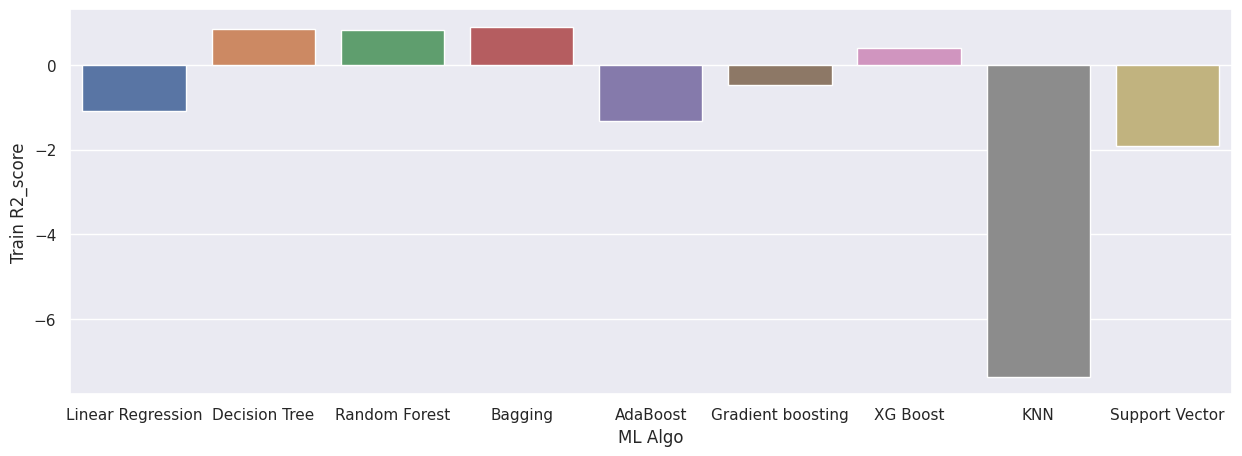

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(x = r2_score_df.index  , y = r2_score_df['Train r2_score'] ,hue=r2_score_df.index , data = r2_score_df)
#plt.xticks(rotation=-10)
plt.xlabel('ML Algo')
plt.ylabel('Train R2_score')

Text(0, 0.5, 'Test R2_score')

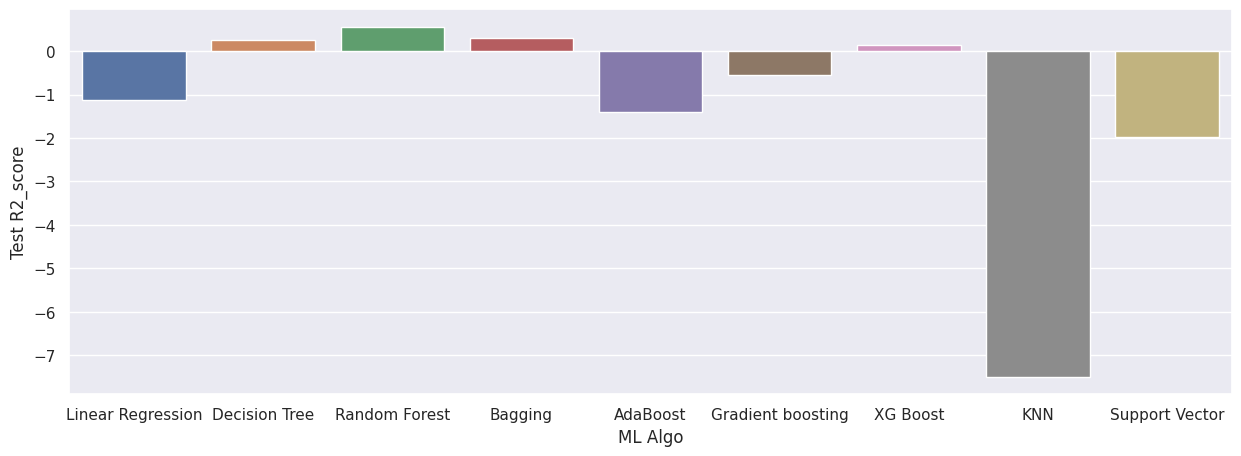

In [90]:
plt.figure(figsize=(15,5))
sns.barplot(x = r2_score_df.index , y = r2_score_df['Test r2_score'] ,hue=r2_score_df.index, data = r2_score_df)
plt.xlabel('ML Algo')
plt.ylabel('Test R2_score')